In [1]:
from adaptive_fps import generate_adaptive_fingerprints

In [9]:
from matchms.importing import load_from_mgf
from rdkit import Chem
from rdkit.Chem import Draw

In [3]:
spectra_path = r"C:\Users\dietr004\Documents\PhD\computational mass spectrometry\MEDUSA\notebooks\MS2LDA\PDE5_standards_annotated_pos_unique.mgf"

In [4]:
spectra = load_from_mgf(spectra_path)

smiles = []
for spectrum in spectra:
    smi = spectrum.get("smiles") 
    smiles.append(smi)

In [5]:
smiles

['O=C1OC(C2=C1C=CC=C2)(C3=CC=C(C=C3)O[H])C4=CC=C(C=C4)O[H]',
 'COC1=CC(=O)OC(C1)/C=C/C2=CC=CC=C2',
 'O[C@H](c1ccccc1)[C@@H](NC)C',
 'Oc1ccc(cc1)CC3c2c(cc(O)c(O)c2)CCN3',
 'CCC(C)CC(C)N',
 'CC1C(C(C(C(O1)OC2=C(OC3=C(C2=O)C(=CC(=C3CC=C(C)C)OC4C(C(C(C(O4)CO)O)O)O)O)C5=CC=C(C=C5)OC)O)O)O',
 'ClC1=CC=C(C2(CCC2)C(CC(C)C)N(C)C)C=C1',
 'CN1CC(=O)N2[C@H](Cc3c([nH]c4ccccc34)[C@H]2c2ccc3c(c2)OCO3)C1=O',
 'CCCC1=NN(C2=C1NC(=NC2=S)C3=C(C=CC(=C3)S(=O)(=O)N4CCN(CC4)C)OCC)C',
 'COC(=O)C1C(CCC2C1CC3C4=C(CCN3C2)C5=CC=CC=C5N4)O',
 'CCCC1=NN(C2=C1N=C(NC2=O)C3=C(C=CC(=C3)S(=O)(=O)N4CCN(CC4)C)OCC)C',
 'CCCC1=NN(C2=C1N=C(NC2=O)C3=C(C=CC(=C3)S(=O)(=O)N4CCN(CC4)CCO)OCC)C',
 'CCCC1=NN(C2=C1N=C(NC2=O)C3=C(C=CC(=C3)C(=O)CN4CCN(CC4)C)OCC)C',
 'CCCC1=NC(=C2N1N=C(NC2=O)C3=C(C=CC(=C3)S(=O)(=O)N4CCN(CC4)CC)OCC)C',
 'CNCC(C1=CC=CC=C1)O',
 'CCCC1=NN(C2=C1N=C(NC2=O)C3=C(C=CC(=C3)C(=O)CN4CCN(CC4)CCO)OCC)C',
 'CCCC1=CN(C2=C1N=C(NC2=O)C3=C(C=CC(=C3)S(=O)(=O)N4CCN(CC4)CCO)OCCC)CC',
 'COC1=C(C=C(C=C1)CNC2=NC(=NC=C2C(=O)NCC3=N

In [6]:
mols = [Chem.MolFromSmiles(smi) for smi in smiles]

In [7]:
fps_adaptive = generate_adaptive_fingerprints(mols)
fps_adaptive

([<rdkit.DataStructs.cDataStructs.ExplicitBitVect at 0x29e789567c0>,
 ['O',
  'N',
  '[nH]',
  'n',
  'nn',
  'NS(=O)=O',
  'OCO',
  'NC=O',
  'Cl',
  'O=CO',
  'C=C',
  'S',
  'C=O',
  'NNC=O',
  'c1ccccc1',
  'O=S(=O)(c1cccc(-c2nc(=S)c3[nH]ncc3[nH]2)c1)N1CCNCC1',
  'O=c1[nH]c(-c2cccc(S(=O)(=O)N3CCNCC3)c2)nc2cn[nH]c12',
  'O=C(CN1CCNCC1)c1cccc(-c2nc3cn[nH]c3c(=O)[nH]2)c1',
  'O=c1[nH]c(-c2cccc(S(=O)(=O)N3CCNCC3)c2)nn2cncc12',
  'O=C1NCC(=O)N2C1Cc1c([nH]c3ccccc13)C2c1ccc2c(c1)OCO2',
  'O=C(O)C=CO',
  'o',
  'O=CNNC=O',
  'O=C1OC(c2ccccc2)(c2ccccc2)c2ccccc21',
  'O=C1C=CCC(/C=C/c2ccccc2)O1',
  'c1ccc(CC2NCCc3ccccc32)cc1',
  '',
  'O=c1c(OC2CCCCO2)c(-c2ccccc2)oc2cc(OC3CCCCO3)ccc12',
  'c1ccc(C2CCC2)cc1',
  'O=C1NCC(=O)N2[C@H](c3ccc4c(c3)OCO4)c3[nH]c4ccccc4c3C[C@H]12',
  'c1ccc2c3c([nH]c2c1)C1CC2CCCCC2CN1CC3',
  'O=c1[nH]c(-c2cccc(S(=O)(=O)N3CCNCC3)c2)nc2cc[nH]c12',
  'O=C(NCc1ncccn1)c1cnc(N2CCCC2)nc1NCc1ccccc1',
  'O=C(NN1CCCCC1)c1cc(-c2ccccc2)n(-c2ccccc2)n1'])

In [12]:
substructure_mols = []
for i in fps_adaptive[1]:
    substructure_mol = Chem.MolFromSmiles(i, sanitize=False)
    if substructure_mol:
        substructure_mols.append(substructure_mol)

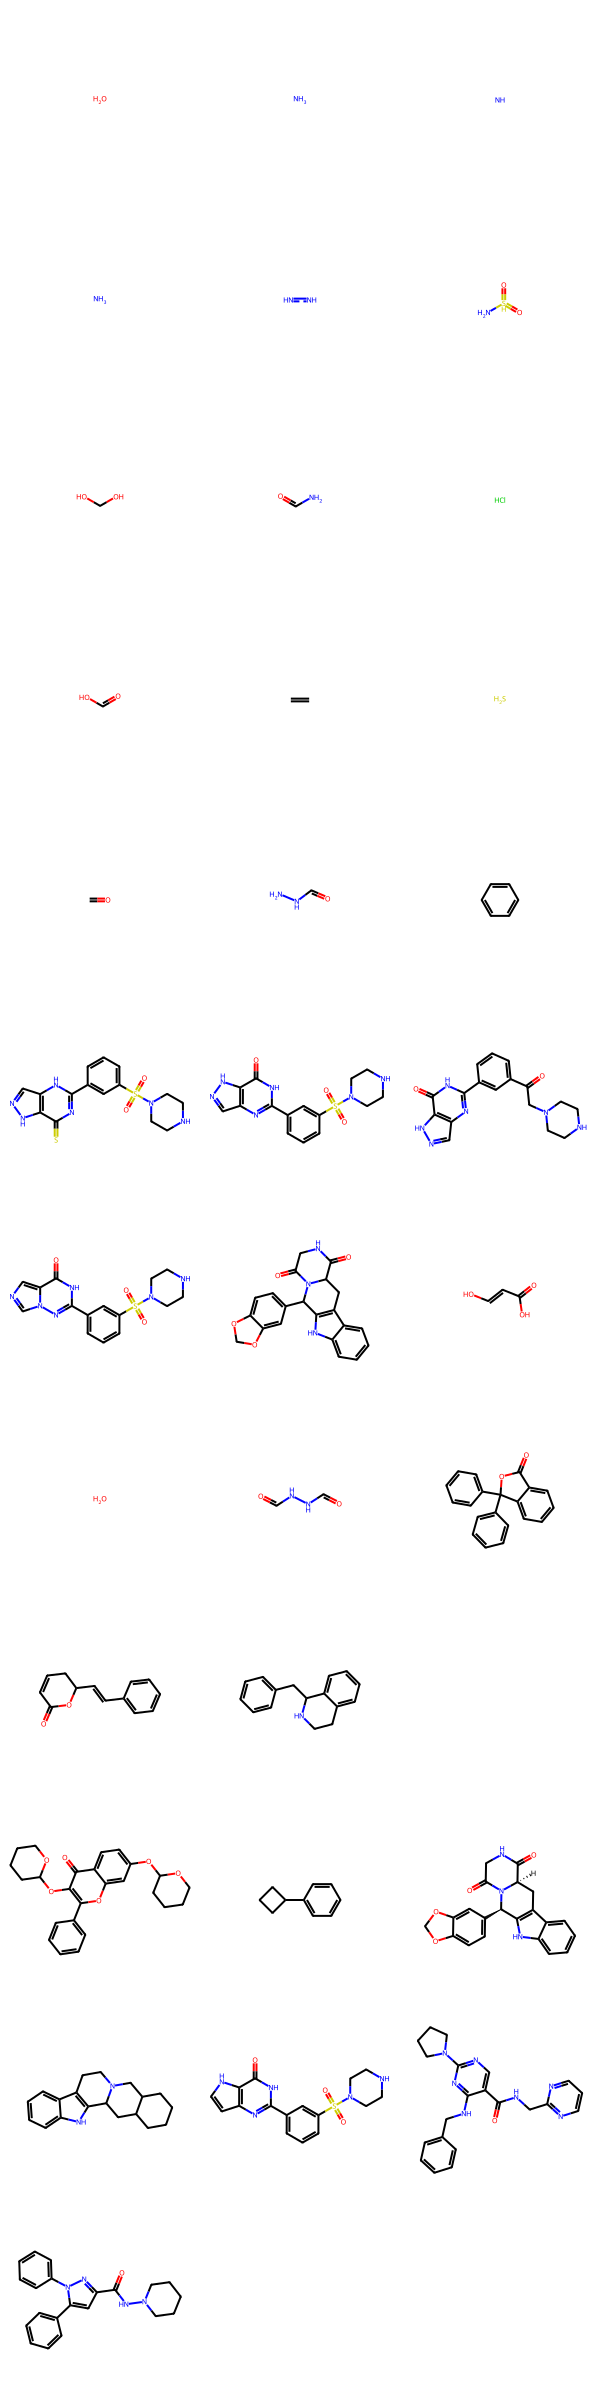

In [16]:
Draw.MolsToGridImage(substructure_mols)